
# Regression

## Install packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 7.4MB 64kB/s  eta 0:00:01
    100% |████████████████████████████████| 12.2MB 38kB/s  eta 0:00:01   24% |███████▉                        | 3.0MB 28.6MB/s eta 0:00:01    36% |███████████▋                    | 4.4MB 31.4MB/s eta 0:00:01    70% |██████████████████████▊         | 8.6MB 23.5MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 17kB/s  eta 0:00:01   27% |████████▉                       | 7.2MB 26.8MB/s eta 0:00:01    37% |████████████                    | 9.7MB 24.7MB/s eta 0:00:01    46% |███████████████                 | 12.2MB 26.3MB/s eta 0:00:01    60% |███████████████████▌            | 15.9MB 23.6MB/s eta 0:00:01    80% |██████████████████████████      | 21.2MB 21.0MB/s eta 0:00:01    85% |███████████████████████████▎    | 22.4MB 23.1MB/s eta 0:00:01    93% |██████████████████████████████  | 24.6MB 21.9MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 430kB/s eta 0:00:01  4% |█▌                  

In [2]:
import pandas as pd
import numpy as np
import os
import helper
import quiz_tests
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate two stock prices


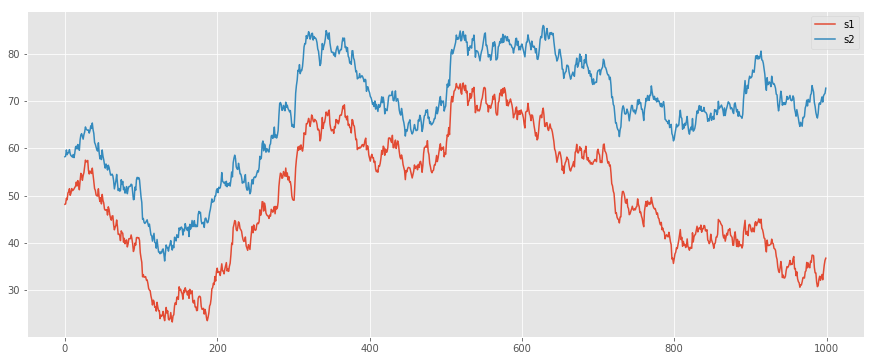

In [4]:
# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

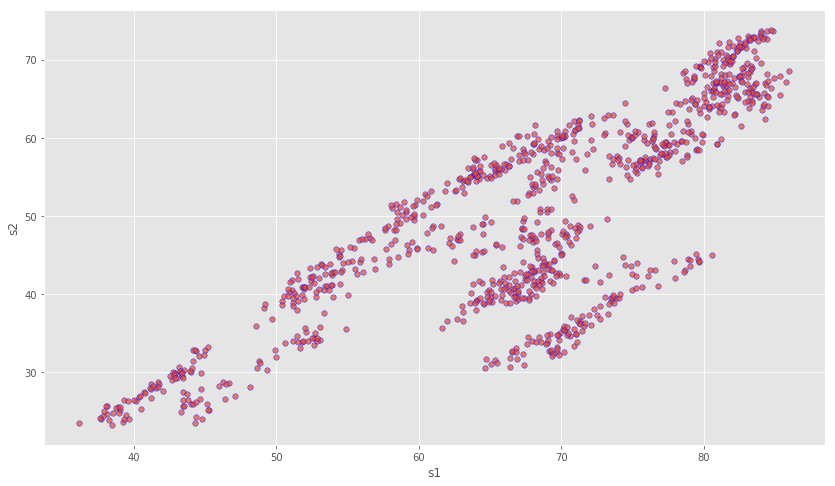

In [5]:
## Plot data with scatterplot
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s1')
plt.ylabel('s2');

In [6]:
from sklearn.linear_model import LinearRegression

## Quiz: Linear Regression

Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays.  

The coefficients of the linear regression, $\beta$ and $intercept$ for the regression line:  
$y = \beta \times x + intercept$  
Can be obtained after fitting to the data.  Use `LinearRegression.coef_[0][0]` for the slope and `LinearRegression.intercept_[0]` for the intercept.

In [8]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    xVar = xSeries.values.reshape((-1,1))
    yVar = ySeries.values.reshape((-1,1))
    
    lr.fit(xVar, yVar)
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    
    return (slope, intercept)

quiz_tests.test_regression_slope_and_intercept(regression_slope_and_intercept);

Tests Passed


In [9]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

slope 0.74 and intercept 30.62


### Plot the fitted regression line over the scatterplot

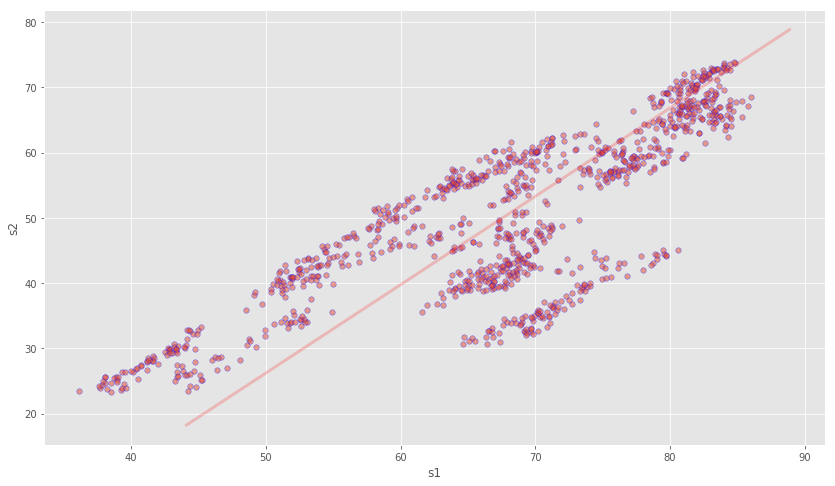

In [10]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s1')
plt.ylabel('s2');

If you're stuck, you can also check out the solution [here](regression_solution.ipynb)